# TD4 Advanced Regressions

#### Following this beautiful publication on Kaggle competition : 
https://www.kaggle.com/shaygu/house-prices-begginer-top-7/notebook

In [1]:
import github_command as gt

In [2]:
gt.push(file_to_transfer="TD4_Advanced_Regressions.ipynb", 
        message="detect outliers", 
        repos="TDs_ESILV")

In [52]:
gt.push(file_to_transfer="TD4_data.ipynb", 
        message="changed files - needed for regression in TD4", 
        repos="TDs_ESILV")

# Table of contents
1. [Importing libraries](#libraries)
2. [Loading and querying data](#data loading)

## Libraries <a name='libraries'/>

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings messages in iPython

import os # os functions for files/directory manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data viz
import seaborn as sns # data viz
import numpy as np # vecotrized function + data manipulation
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax # for skewness
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, Image
%matplotlib inline

In [4]:
pd.set_option('display.float_format', 
              lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [5]:
if not os.path.exists("TD4_data/"):
    os.mkdir("TD4_data/")

In [6]:
os.listdir("TD4_data")

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']

## Data Loading and Querying <a name="data loading" />

In [12]:
# Read files
train = pd.read_csv("./TD4_data/train.csv")
test  = pd.read_csv("./TD4_data/test.csv")

In [13]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [14]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id",  axis = 1, inplace = True)

In [10]:
# From EDA obvious outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])


print (train.columns)
print(test.columns)
print(train.shape,test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Outlier detection

In [17]:
numerical_columns = train.dtypes[train.dtypes=='int64'].index

In [18]:
def find_outlier(col, number_stds):
    try:
        return [ val for val in col if np.abs(val) > number_stds * np.std(col) ]
    except:
        return 'error'

In [19]:
def indices_outlier(col):
    return list(col[col].index.values)

In [20]:
train[numerical_columns].apply(find_outlier, number_stds=7).to_frame()

,0
MSSubClass,[]
LotArea,"[159000, 215245, 164660, 70761, 115149]"
OverallQual,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
OverallCond,"[8, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, ..."
YearBuilt,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197..."
YearRemodAdd,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197..."
BsmtFinSF1,[5644]
BsmtFinSF2,[1474]
BsmtUnfSF,[]
TotalBsmtSF,"[3206, 3094, 3200, 3138, 6110]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d28d908>,
      dtype=object)

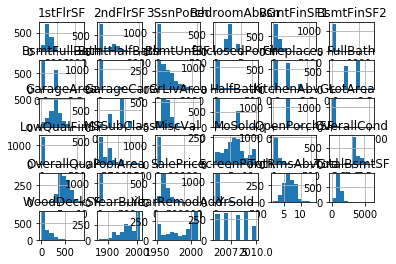

In [31]:
train[numerical_columns].hist()

In [23]:
plt.subplots(figsize(20,20), nrow=numerical_columns:

MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [146]:
for num_col in numerical_columns:
    train[[num_col]].apply(find_outlier).groupby(num_col).filter(lambda x: x==True)

TypeError: filter function returned a Series, but expected a scalar bool

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
5,False,False,True,True,True,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
6,False,False,True,True,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
7,False,False,True,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
8,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [98]:
train[(train.dtypes=='int64').index].apply(ids_outlier, std_col=np.std, axis=0)

TypeError: ("unsupported operand type(s) for *: 'float' and 'function'", 'occurred at index MSSubClass')